In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

In [57]:
# n_radii = 20
# n_areas = 10
# radii = np.arctan(np.radians(np.linspace(1, 9, n_radii)))
# areas = np.linspace(0.01, 0.26, n_areas)

# np.savetxt('outputs_parallel/radii.txt', radii)
# np.savetxt('outputs_parallel/areas.txt', areas)

In [74]:
from glob import glob
radii = np.loadtxt('outputs_parallel/radii.txt')
areas = np.loadtxt('outputs_parallel/areas.txt')
significance = np.sum(np.array([np.loadtxt(p) for p in glob('outputs_parallel/*significance.txt')]), axis=0)
n_occultations = np.sum(np.array([np.loadtxt(p) for p in glob('outputs_parallel/*n_occultations.txt')]), axis=0)
n_models = np.sum(np.array([np.loadtxt(p) for p in glob('outputs_parallel/*n_models.txt')]), axis=0)
oot_ptp = np.loadtxt('outputs/oot_ptp2.txt')
halfptp = 0.002433
# radii = np.loadtxt('outputs_1/radii.txt')
# contrasts = np.loadtxt('outputs_1/contrasts.txt')
# n_significant = np.loadtxt('outputs_1/n_significant.txt')
# n_occultations = np.loadtxt('outputs_1/n_occultations.txt')

In [132]:
# extent = [areas.min(), areas.max(), radii.min(), radii.max()]

# n_iterations = 100

# props = dict(origin='lower', extent=extent, aspect=2) # vmin=0, vmax=1, 

# fig, ax = plt.subplots(1, 3, figsize=(14, 4))#, sharey=True)
# img = ax[1].imshow(significance, **props)
# cax = plt.colorbar(img, ax=ax[1])
# cax.set_label('In-transit S/N')
# ax[1].set_ylabel('Spot Radius')
# ax[1].set_xlabel('Spoted area')

# ax[0].set_xlabel('Spoted area')
# ax[0].set_ylabel('Spot Radius')
# img = ax[0].imshow(n_occultations/n_models, **props)
# cax = plt.colorbar(img, ax=ax[0])
# cax.set_label('Fraction of transits w/ occultations')

# ax[2].set_xlabel('Spoted area')
# ax[2].set_ylabel('Spot Radius')
# img = ax[2].imshow(oot_ptp / halfptp, vmin=0, vmax=5, **props)
# cax = plt.colorbar(img, ax=ax[2])
# cax.set_label('OOT S/N')

# fig.tight_layout()

In [126]:
def plot_segments(mask, extent, axis):
    ver_seg = np.where(mask[:,1:] != mask[:,:-1])
    hor_seg = np.where(mask[1:,:] != mask[:-1,:])
    l = []
    for p in zip(*hor_seg):
        l.append((p[1], p[0]+1))
        l.append((p[1]+1, p[0]+1))
        l.append((np.nan,np.nan))

    # and the same for vertical segments
    for p in zip(*ver_seg):
        l.append((p[1]+1, p[0]))
        l.append((p[1]+1, p[0]+1))
        l.append((np.nan, np.nan))

    segments = np.array(l)
    segments[:,0] = x0 + (x1-x0) * segments[:,0] / mask.shape[1]
    segments[:,1] = y0 + (y1-y0) * segments[:,1] / mask.shape[0]
    axis.plot(segments[:,0], segments[:,1], color='w', linewidth=3)

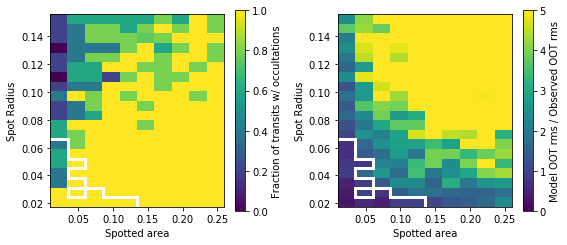

In [135]:
extent = [areas.min(), areas.max(), radii.min(), radii.max()]

props = dict(origin='lower', extent=extent, aspect=2) # vmin=0, vmax=1, 

mask = (oot_ptp / halfptp < 1.) #& ((n_occultations/n_models) < 0.5)

fig, ax = plt.subplots(1, 2, figsize=(8, 3.5))#, sharey=True)

ax[0].set_xlabel('Spotted area')
ax[0].set_ylabel('Spot Radius')
img = ax[0].imshow(n_occultations/n_models, **props)
cax = plt.colorbar(img, ax=ax[0])
cax.set_label('Fraction of transits w/ occultations')
#ax[0].plot(areas, 3*areas - 0.02, ls='--', color='w', lw=2)
plot_segments(mask, extent, ax[0])

ax[1].set_xlabel('Spotted area')
ax[1].set_ylabel('Spot Radius')
img = ax[1].imshow(oot_ptp / halfptp, vmin=0, vmax=5, **props)
cax = plt.colorbar(img, ax=ax[1])
cax.set_label('Model OOT rms / Observed OOT rms')
#ax[1].plot(areas, -0.5*areas + 0.13, ls='--', color='w', lw=2)
plot_segments(mask, extent, ax[1])

for axis in ax:
    axis.set_xlim([areas.min(), areas.max()])
    axis.set_ylim([radii.min(), radii.max()])

fig.tight_layout()
fig.savefig('grid_search.pdf', bbox_inches='tight')

In [134]:
(n_occultations/n_models)[mask].min()

0.40000000000000002

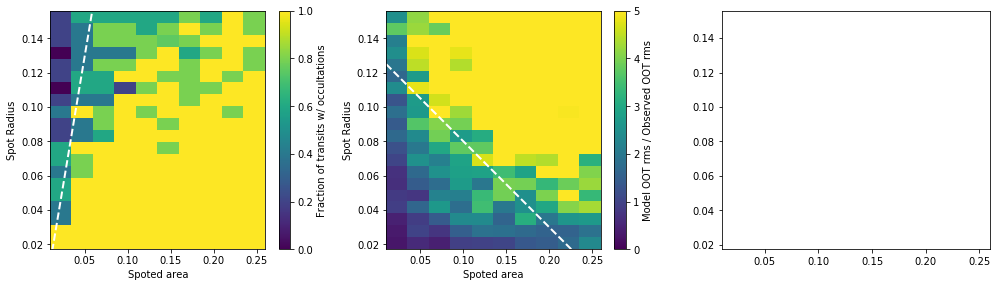

In [99]:
extent = [areas.min(), areas.max(), radii.min(), radii.max()]

props = dict(origin='lower', extent=extent, aspect=2) # vmin=0, vmax=1, 

fig, ax = plt.subplots(1, 3, figsize=(14, 4))#, sharey=True)

ax[0].set_xlabel('Spoted area')
ax[0].set_ylabel('Spot Radius')
img = ax[0].imshow(n_occultations/n_models, **props)
cax = plt.colorbar(img, ax=ax[0])
cax.set_label('Fraction of transits w/ occultations')
ax[0].plot(areas, 3*areas - 0.02, ls='--', color='w', lw=2)

ax[1].set_xlabel('Spoted area')
ax[1].set_ylabel('Spot Radius')
img = ax[1].imshow(oot_ptp / halfptp, vmin=0, vmax=5, **props)
cax = plt.colorbar(img, ax=ax[1])
cax.set_label('Model OOT rms / Observed OOT rms')
ax[1].plot(areas, -0.5*areas + 0.13, ls='--', color='w', lw=2)

for axis in ax:
    axis.set_xlim([areas.min(), areas.max()])
    axis.set_ylim([radii.min(), radii.max()])

fig.tight_layout()
fig.savefig('grid_search_summary.pdf', bbox_inches='tight')